WNS Analytics Wizard 2018
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.



Dataset Description
Variable	Definition
employee_id	Unique ID for employee
department	Department of employee
region	Region of employment (unordered)
education	Education Level
gender	Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
age	Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted	(Target) Recommended for promotion

Evaluation Metric
The evaluation metric for this competition is F1 Score.



Public and Private Split
Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sub = pd.read_csv('sample_submission.csv')

In [ ]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [ ]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
train.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.head(50)

#department/region/education/gender/recruitment_channel--Categorical data- ohe encoding
#	no_of_trainings/age/previous_year_rating	/length_of_service/KPIs_met >80%	/awards_won?	/avg_training_score-- Numerical Data
# Is_promoted-Target(0/1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [ ]:
#percent of data missing in each col
(train.isna().sum()/train.shape[0]*100).sort_values()

,0
employee_id,0.000000
department,0.000000
region,0.000000
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
length_of_service,0.000000
KPIs_met >80%,0.000000
awards_won?,0.000000


In [ ]:
#duplicated data
train.duplicated().sum()

0

In [ ]:
#specific column's data distribution
train.is_promoted.value_counts()
#in percent
train.is_promoted.value_counts(normalize=True)*100

,proportion
is_promoted,
0,91.482995
1,8.517005


In [ ]:
train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


<Axes: xlabel='is_promoted'>

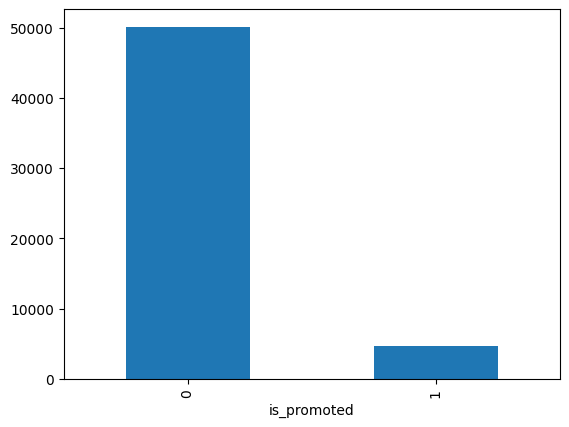

In [ ]:
train.is_promoted.value_counts().plot(kind='bar')

In [ ]:
tgt_col=['is_promoted']
ign_col =['employee_id']
#cat_col=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
#num_col=['training_hours']

In [ ]:
#visualize numerical column ignoring enrollee_id-col
train.drop(columns=ign_col).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [ ]:
train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [ ]:
train.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [ ]:
# prompt: for col in train.drop(columns=ign_col).columns:

for col in train.drop(columns=ign_col).columns:
    if train[col].dtype == 'object':
        print(f'{col}: {train[col].unique()}')

department: ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region: ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education: ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender: ['f' 'm']
recruitment_channel: ['sourcing' 'other' 'referred']


In [ ]:
#printing Unique values of each  column
for col in train.drop(columns=ign_col).columns:
   print(col, train[col].nunique(), '=>', train[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 5 => [ 5.  3.  1.  4. nan  2.]
length_of_service 35 => [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17

<Axes: xlabel='no_of_trainings', ylabel='Density'>

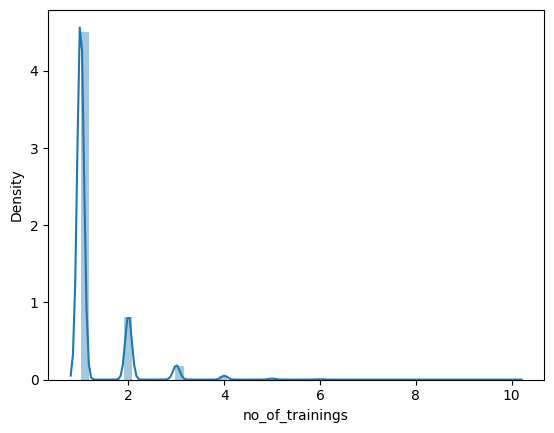

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(train['no_of_trainings'])

<Axes: xlabel='length_of_service', ylabel='Density'>

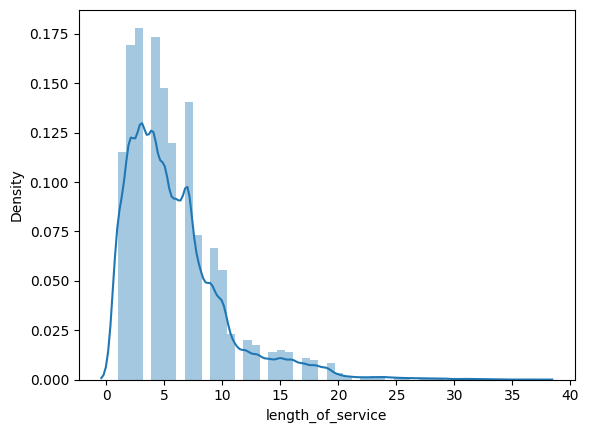

In [ ]:
sns.distplot(train['length_of_service'])
#most of the stu are in city dev index

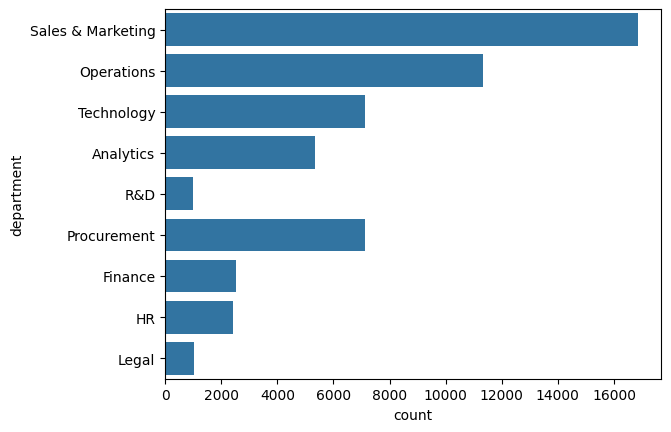

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64


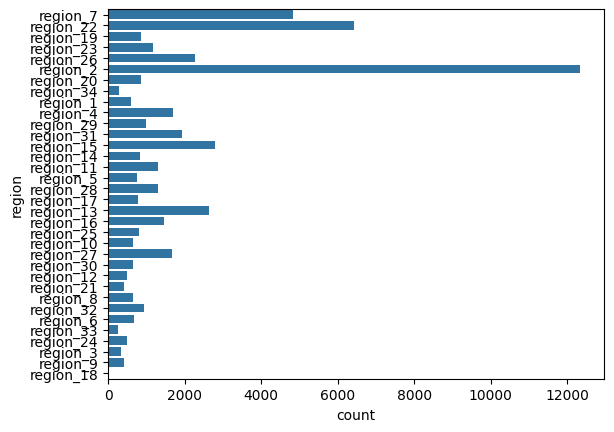

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64


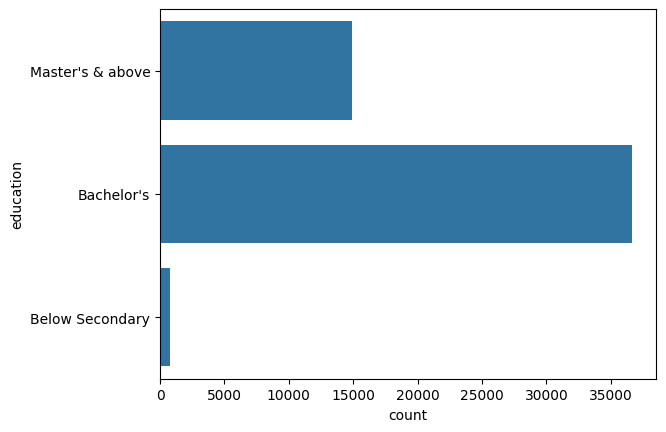

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


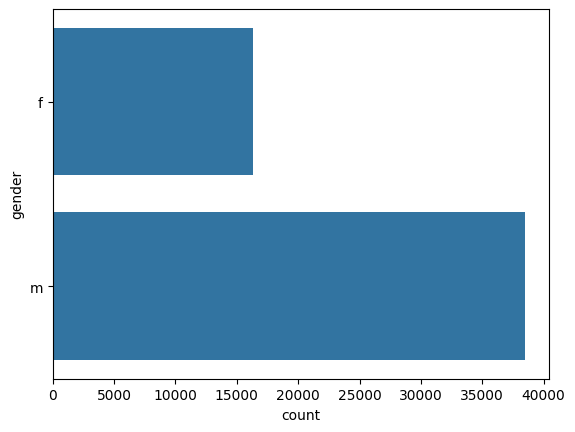

gender
m    38496
f    16312
Name: count, dtype: int64


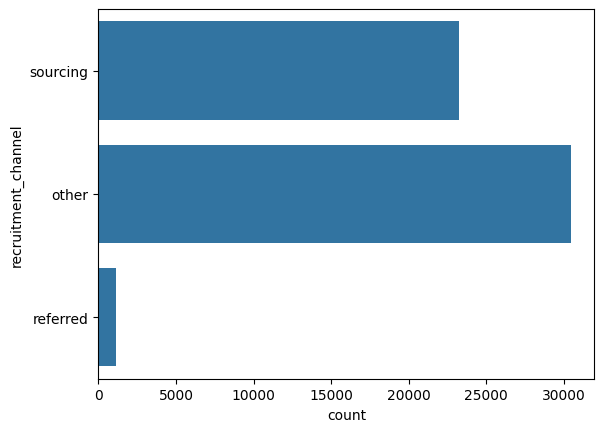

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64


In [ ]:
#data visualization using plot
#In department, 30 % of data are from Sales & martketing.
# In region 20%  are from region2
#In education, 60% holds bachelor degree and 28% in masters
#In gender, 70%-male and 30% female
#employment type-others nearly 65%, sourcing-30%

for col in train.select_dtypes(include='object').columns:
    sns.countplot(train[col])
    plt.show()
    #print(col)
    print(train[col].value_counts())

<Axes: ylabel='length_of_service,is_promoted'>

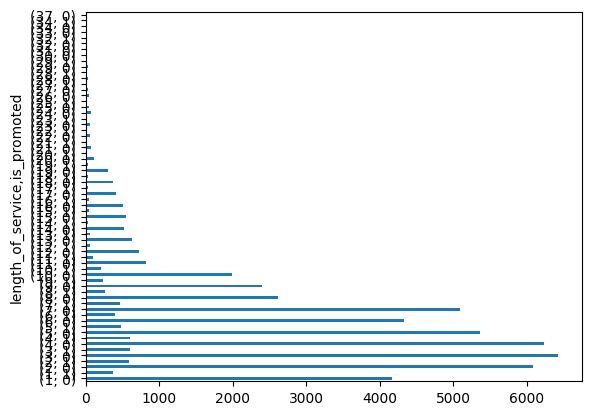

In [ ]:
train[['length_of_service', 'is_promoted']].groupby('length_of_service').value_counts().plot(kind='barh')

In [ ]:
#unstack-converting series to data

exp_tgt= train[['length_of_service', 'is_promoted']].groupby('length_of_service').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)
#exp_tgt.plot(kind='barh')

is_promoted,0,1,%
length_of_service,,,
34,3.0,1.0,25.000000
32,8.0,2.0,20.000000
23,58.0,7.0,10.769231
11,820.0,96.0,10.480349
29,27.0,3.0,10.000000
22,55.0,6.0,9.836066
19,297.0,32.0,9.726444
8,2614.0,269.0,9.330558
10,1989.0,204.0,9.302326


In [ ]:
#Address missing data, encoding, treat imbalance, standaridize numerical col

In [ ]:
train.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [ ]:
cat_cols= ['department', 'region', 'education', 'gender', 'recruitment_channel']
num_cols= ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [ ]:
print(tgt_col, ign_col, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [ ]:
cat_pipe_encode= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #missing val-mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   #category encoding()
])

In [ ]:
num_pipe_encode= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #missing val
    ('scaler', StandardScaler()) #standard scaling
])

In [ ]:
preprocess =  ColumnTransformer(transformers=[
    ('cat', cat_pipe_encode, cat_cols),
    ('num', num_pipe_encode, num_cols)
])

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression())
])

In [ ]:
X= train.drop(columns=tgt_col+ign_col)
y= train[tgt_col]

In [ ]:
train_X, val_X, train_y,val_y=train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape,val_y.shape

((49327, 12), (5481, 12), (49327, 1), (5481, 1))

In [ ]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve # Import roc_curve

In [ ]:
predicted_train_tgt=model_pipeline.predict(train_X)
predicted_val_tgt=model_pipeline.predict(val_X)

In [ ]:
print(roc_auc_score(train_y, model_pipeline.predict_proba(train_X)[:,1]))
print(roc_auc_score(val_y, model_pipeline.predict_proba(val_X)[:,1]))
#

0.87544650818469
0.8716133330270383


In [ ]:
print(classification_report(train_y, model_pipeline.predict(train_X)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.81      0.26      0.40      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.63      0.68     49327
weighted avg       0.92      0.93      0.91     49327



In [ ]:
print(confusion_matrix(train_y, predicted_train_tgt))
print(confusion_matrix(val_y, predicted_val_tgt))

[[44835   255]
 [ 3127  1110]]
[[5023   27]
 [ 315  116]]


In [ ]:
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):
    #model_pipeline.fit(train_X, train_y)
    print(confusion_matrix(train_y, predicted_train_tgt))
    print(confusion_matrix(val_y, predicted_val_tgt))

    print(roc_auc_score(train_y, model_pipeline.predict_proba(train_X)[:,1]))
    print(roc_auc_score(val_y, model_pipeline.predict_proba(val_X)[:,1]))

    print(classification_report(train_y, model_pipeline.predict(train_X)))
    print(classification_report(val_y, model_pipeline.predict(val_y)))

In [ ]:
model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

[[44835   255]
 [ 3127  1110]]
[[5023   27]
 [ 315  116]]
0.87544650818469
0.8716133330270383
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.81      0.26      0.40      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.63      0.68     49327
weighted avg       0.92      0.93      0.91     49327



ValueError: columns are missing: {'region', 'awards_won?', 'gender', 'avg_training_score', 'previous_year_rating', 'no_of_trainings', 'age', 'KPIs_met >80%', 'recruitment_channel', 'education', 'department', 'length_of_service'}

In [ ]:
def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Train cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    print(roc_auc_score(train_y, model_pipeline.predict_proba(train_X)[:,1]))
    print(roc_auc_score(val_y, model_pipeline.predict_proba(val_X)[:,1]))

    y_pred_probs=model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thresholds=roc_curve(val_y, y_pred_probs)
    #roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr)
    plt.show()

In [ ]:
model_pipeline.predict_proba(val_X)
# val should be in 0 or 1.
#how many poss of 0 or 1
    #        0           1
#array([[0.83788855, 0.16211145],   0
    #   [0.89245315, 0.10754685],    0
     #  [0.9161205 , 0.0838795 ],     0
    #   ...,
     #  [0.88705445, 0.11294555],    1
     #  [0.92663684, 0.07336316],
   #    [0.91339528, 0.08660472]])

array([[0.99339559, 0.00660441],
       [0.98702015, 0.01297985],
       [0.95857997, 0.04142003],
       ...,
       [0.94213707, 0.05786293],
       [0.95204576, 0.04795424],
       [0.97700553, 0.02299447]])

Train cnf_matrix
[[44835   255]
 [ 3127  1110]]
Train cnf_matrix
[[5023   27]
 [ 315  116]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.81      0.26      0.40      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.63      0.68     49327
weighted avg       0.92      0.93      0.91     49327

Train cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5050
           1       0.81      0.27      0.40       431

    accuracy                           0.94      5481
   macro avg       0.88      0.63      0.69      5481
weighted avg       0.93      0.94      0.92      5481

0.87544650818469
0.8716133330270383


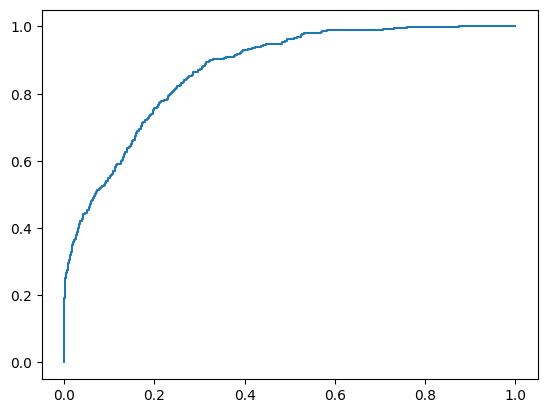

In [ ]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

In [ ]:
params =[{'model': [LogisticRegression()],
          'model__penalty': ['l2',None],
          'model__C':[0.5,3]
          }]

In [ ]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params, cv=2, scoring='roc_auc')

In [ ]:
grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [ ]:
grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}

In [ ]:
res_df=pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.874418,1
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.871305,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.872041,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.871305,3


In [ ]:
train.columns.difference(test.columns)
# updating the existing target values with predicted values
sub['is_promoted'] = model_pipeline.predict(test)
sub.to_csv('sub_1.csv',index=False)

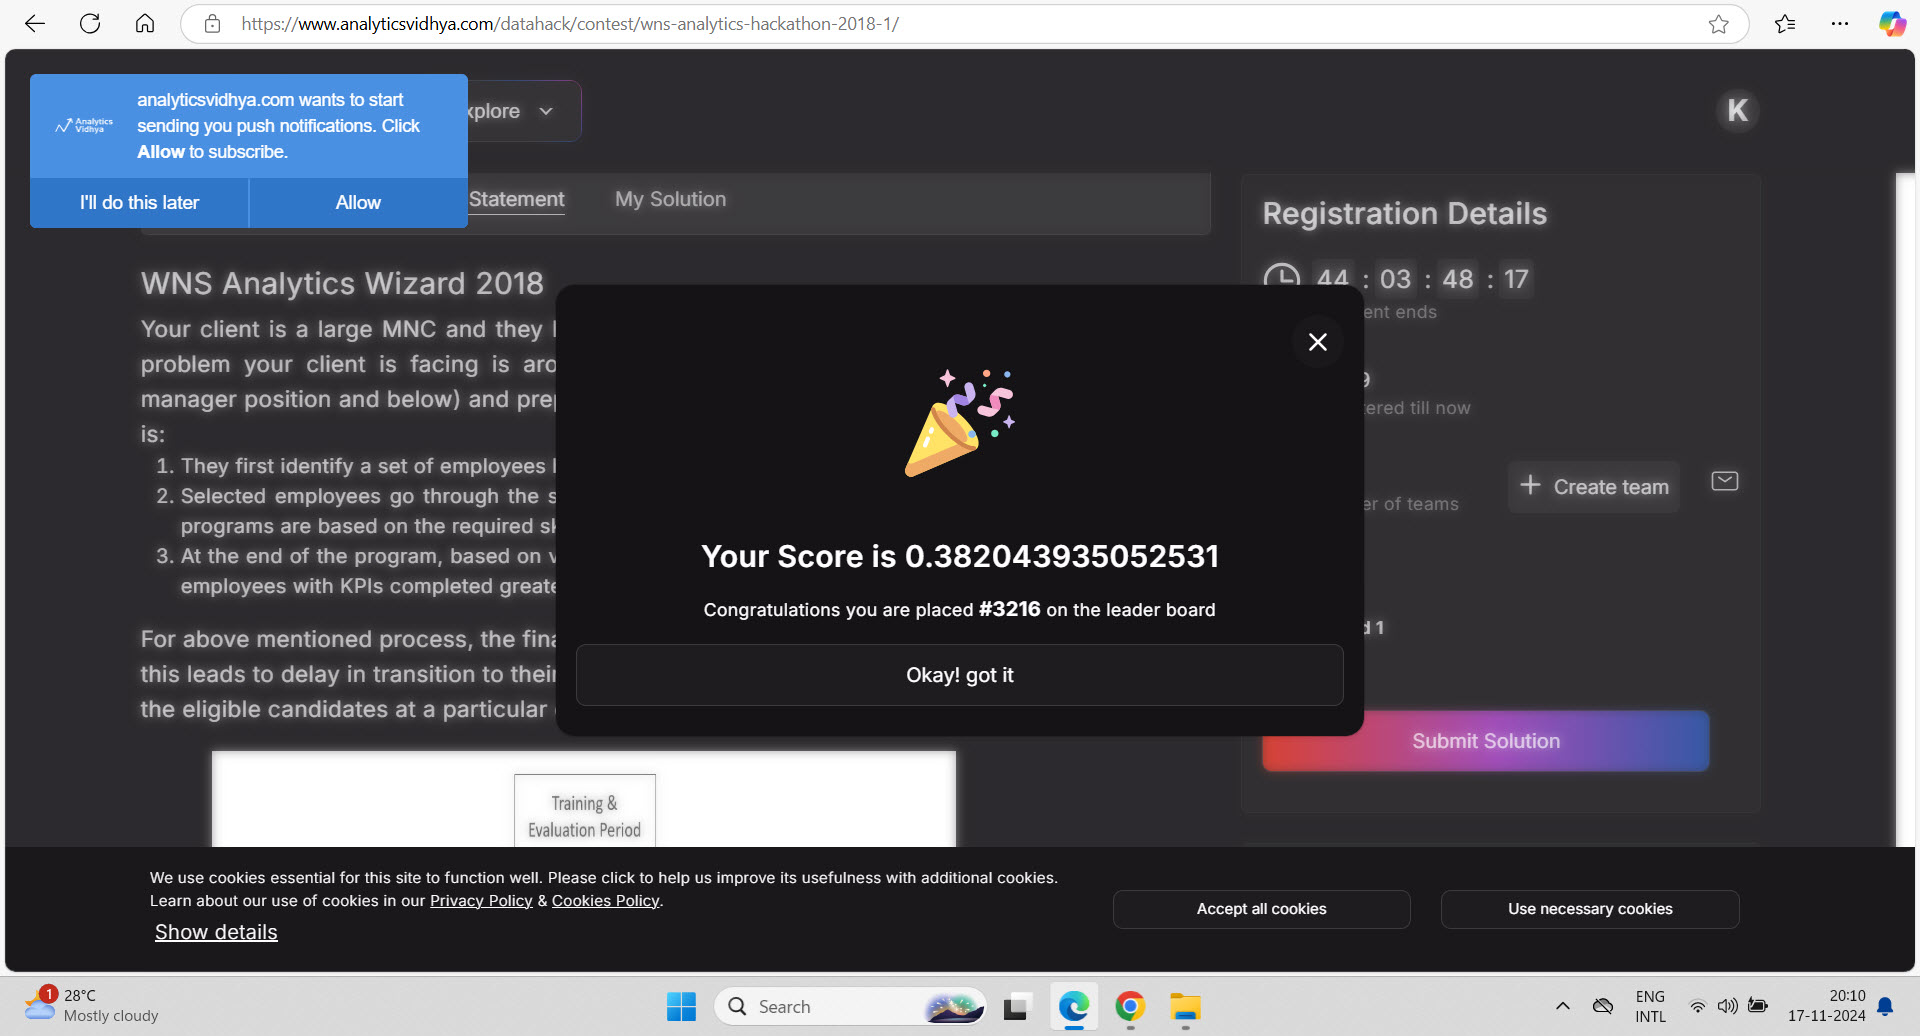

In [ ]:
#create pickle file
import joblib
joblib.dump(model_pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [ ]:
#imbalanced data
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
imblearn.__version__

'0.12.4'

In [ ]:
over_sampling=RandomOverSampler()

In [ ]:
train_X_os, train_y_os=over_sampling.fit_resample(train_X, train_y)
#val_X_os, val_y_os=over_sampling.fit_resample(val_X, val_y)

In [ ]:
train_y_os.value_counts()

,count
is_promoted,
0,45090
1,45090


In [ ]:
train_X_os.value_counts()

department         region     education         gender  recruitment_channel  no_of_trainings  age  previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  avg_training_score
Sales & Marketing  region_2   Master's & above  m       other                2                49   5.0                   3                  0              0            63                    22
                              Bachelor's        m       other                2                37   4.0                   9                  1              0            64                    22
Finance            region_16  Below Secondary   m       sourcing             1                23   5.0                   2                  1              0            59                    22
Operations         region_2   Bachelor's        m       other                5                25   5.0                   2                  1              0            60                    21
                              Master's & above  m       sourcing             1                34   5.0                   2                  1              0            62                    21
                                                                                                                                                                                              ..
                   region_26  Bachelor's        m       sourcing             2                33   3.0                   7                  1              0            62                     1
                                                                                                   5.0                   2                  1              0            65                     1
                                                                                                                         7                  1              0            61                     1
                              Below Secondary   m       other                1                24   3.0                   3                  0              0            59                     1
Technology         region_9   Master's & above  m       other                2                32   3.0                   7                  0              0            78                     1
Name: count, Length: 43758, dtype: int64

In [ ]:
params_2 =[
    {'model': [LogisticRegression()],
          'model__penalty': ['l2',None],
          'model__C':[0.5,3]
          },
    {'model': [DecisionTreeClassifier()],
          'model__max_depth': [3,5,6,9]
          #'model__C':[0.5,3]
          }
]

In [ ]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, cv=2, scoring='roc_auc')

In [ ]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5, 6, 9]}],
             scoring='roc_auc')

In [ ]:
grid_2.best_params_

{'model': DecisionTreeClassifier(), 'model__max_depth': 9}

In [ ]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', DecisionTreeClassifier(max_depth=9))])

In [ ]:
new_model_pipeline1=grid_2.best_estimator_

In [ ]:
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):
    # Fit the model to the training data:
    model_pipeline.fit(train_X, train_y)

    # Make predictions on the training and validation sets:
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    # Check the shapes of the inputs before calculating the confusion matrix:
    print("Shape of train_y:", train_y.shape)
    print("Shape of predicted_train_tgt:", predicted_train_tgt.shape)
    print("Shape of val_y:", val_y.shape)
    print("Shape of predicted_val_tgt:", predicted_val_tgt.shape)

    print('Train cnf_matrix', confusion_matrix(train_y, predicted_train_tgt), sep='\n')
    print('Validation cnf_matrix', confusion_matrix(val_y, predicted_val_tgt), sep='\n')

    print('Train cls_rep', classification_report(train_y, predicted_train_tgt), sep='\n')
    print('Validation cls_rep', classification_report(val_y, predicted_val_tgt), sep='\n')

In [ ]:
model_train_val_eval(train_X, val_X, train_y, val_y, new_model_pipeline1)

Shape of train_y: (49327, 1)
Shape of predicted_train_tgt: (49327,)
Shape of val_y: (5481, 1)
Shape of predicted_val_tgt: (5481,)
Train cnf_matrix
[[45045    45]
 [ 2950  1287]]
Validation cnf_matrix
[[5034   16]
 [ 305  126]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     45090
           1       0.97      0.30      0.46      4237

    accuracy                           0.94     49327
   macro avg       0.95      0.65      0.72     49327
weighted avg       0.94      0.94      0.92     49327

Validation cls_rep
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5050
           1       0.89      0.29      0.44       431

    accuracy                           0.94      5481
   macro avg       0.92      0.64      0.70      5481
weighted avg       0.94      0.94      0.93      5481



In [ ]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.878308,5
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.878609,2
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.878563,4
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.878609,2
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.798587,8
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.851032,7
6,"{'model': DecisionTreeClassifier(), 'model__max_depth': 6}",0.862796,6
7,"{'model': DecisionTreeClassifier(), 'model__max_depth': 9}",0.900630,1


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
#Differenct param combination 3

params_3 =[
    {'model': [LogisticRegression()],
          'model__penalty': ['l2',None],
          'model__C':[0.5,3]
          },
    {'model': [DecisionTreeClassifier()],
         'model__max_depth': [3,5]
          #'model__C':[0.5,3,6,9,12]
          },
    {'model': [StackingClassifier(estimators=[
        ['sclf1', RandomForestClassifier()],
        ['sclf2', GradientBoostingClassifier()],
        ['sclf3', AdaBoostClassifier()],],
        final_estimator=LogisticRegression()
    )],
          'model__sclf1__max_depth': [4,8,12,15,18],
          'model__sclf2__n_estimators': [15,25, 35],
          'model__sclf3__n_estimators': [5,35,50]
          #'model__C':[0.5,3]
          }
]


In [ ]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, cv=2, scoring='roc_auc')

In [ ]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          Sta...
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8, 12, 15, 18],
                          'model__sclf2__n_estimators': [15, 25, 35],
                          'model__sclf3__n_estimators': [5, 35, 50]}],
             scoring='roc_auc')

In [ ]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                ['sclf2', GradientBoostingClassifier()],
                                ['sclf3', AdaBoostClassifier()]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 18,
 'model__sclf2__n_estimators': 35,
 'model__sclf3__n_estimators': 35}

In [ ]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=18)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=35)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=35)]],
                                    final_estimator=LogisticRegression()))])

In [ ]:
new_model_pipeline2=grid_3.best_estimator_

In [ ]:
model_train_val_eval(train_X, val_X, train_y, val_y, new_model_pipeline2)

Shape of train_y: (49327, 1)
Shape of predicted_train_tgt: (49327,)
Shape of val_y: (5481, 1)
Shape of predicted_val_tgt: (5481,)
Train cnf_matrix
[[45030    60]
 [ 2212  2025]]
Validation cnf_matrix
[[5012   38]
 [ 290  141]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     45090
           1       0.97      0.48      0.64      4237

    accuracy                           0.95     49327
   macro avg       0.96      0.74      0.81     49327
weighted avg       0.95      0.95      0.95     49327

Validation cls_rep
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5050
           1       0.79      0.33      0.46       431

    accuracy                           0.94      5481
   macro avg       0.87      0.66      0.72      5481
weighted avg       0.93      0.94      0.93      5481



In [ ]:
res_df_2 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.878308,36
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.878609,32
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.878563,34
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.878609,32
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.798587,51
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.851013,47
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 5}",0.846402,50
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 35}",0.848272,49
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 50}",0.849473,48
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 5}",0.857939,46


In [ ]:
train.columns.difference(test.columns)
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_pipeline2.predict(test)

sub.to_csv('sub_4.csv',index=False)

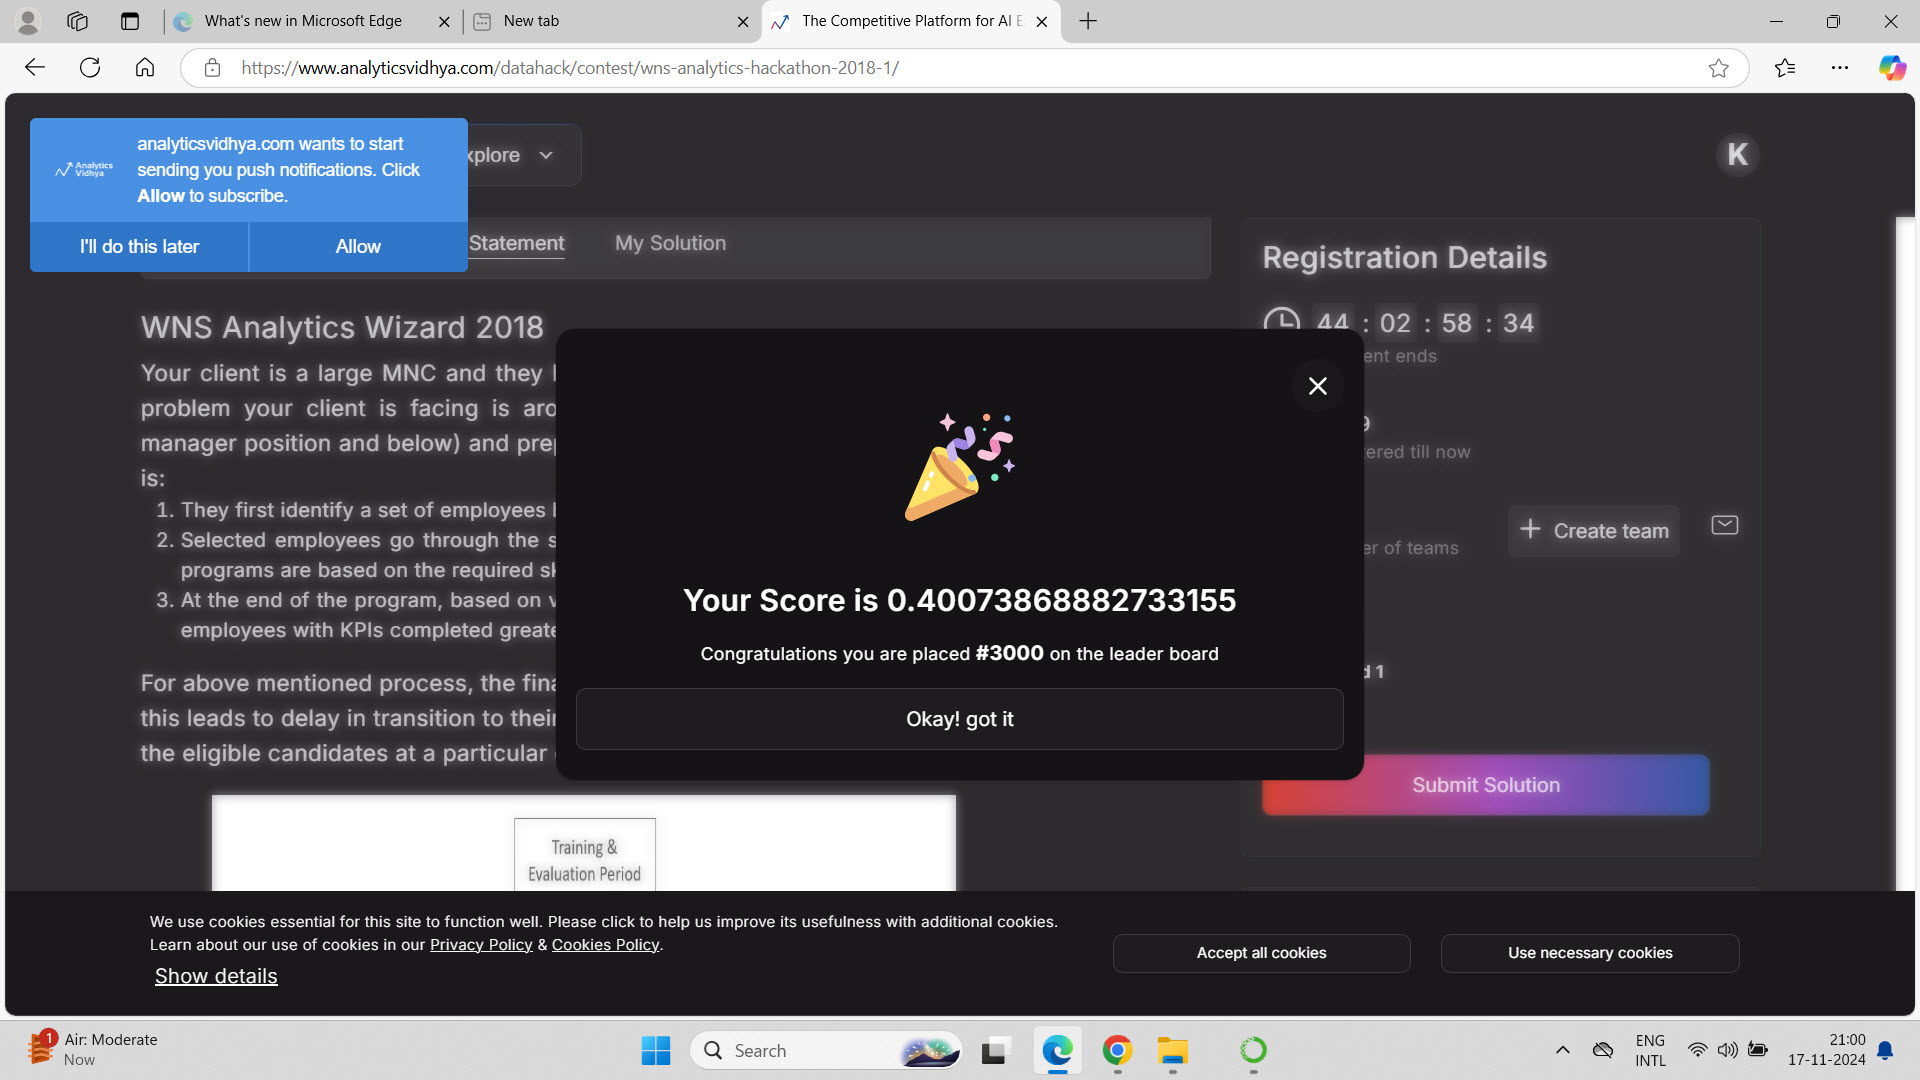

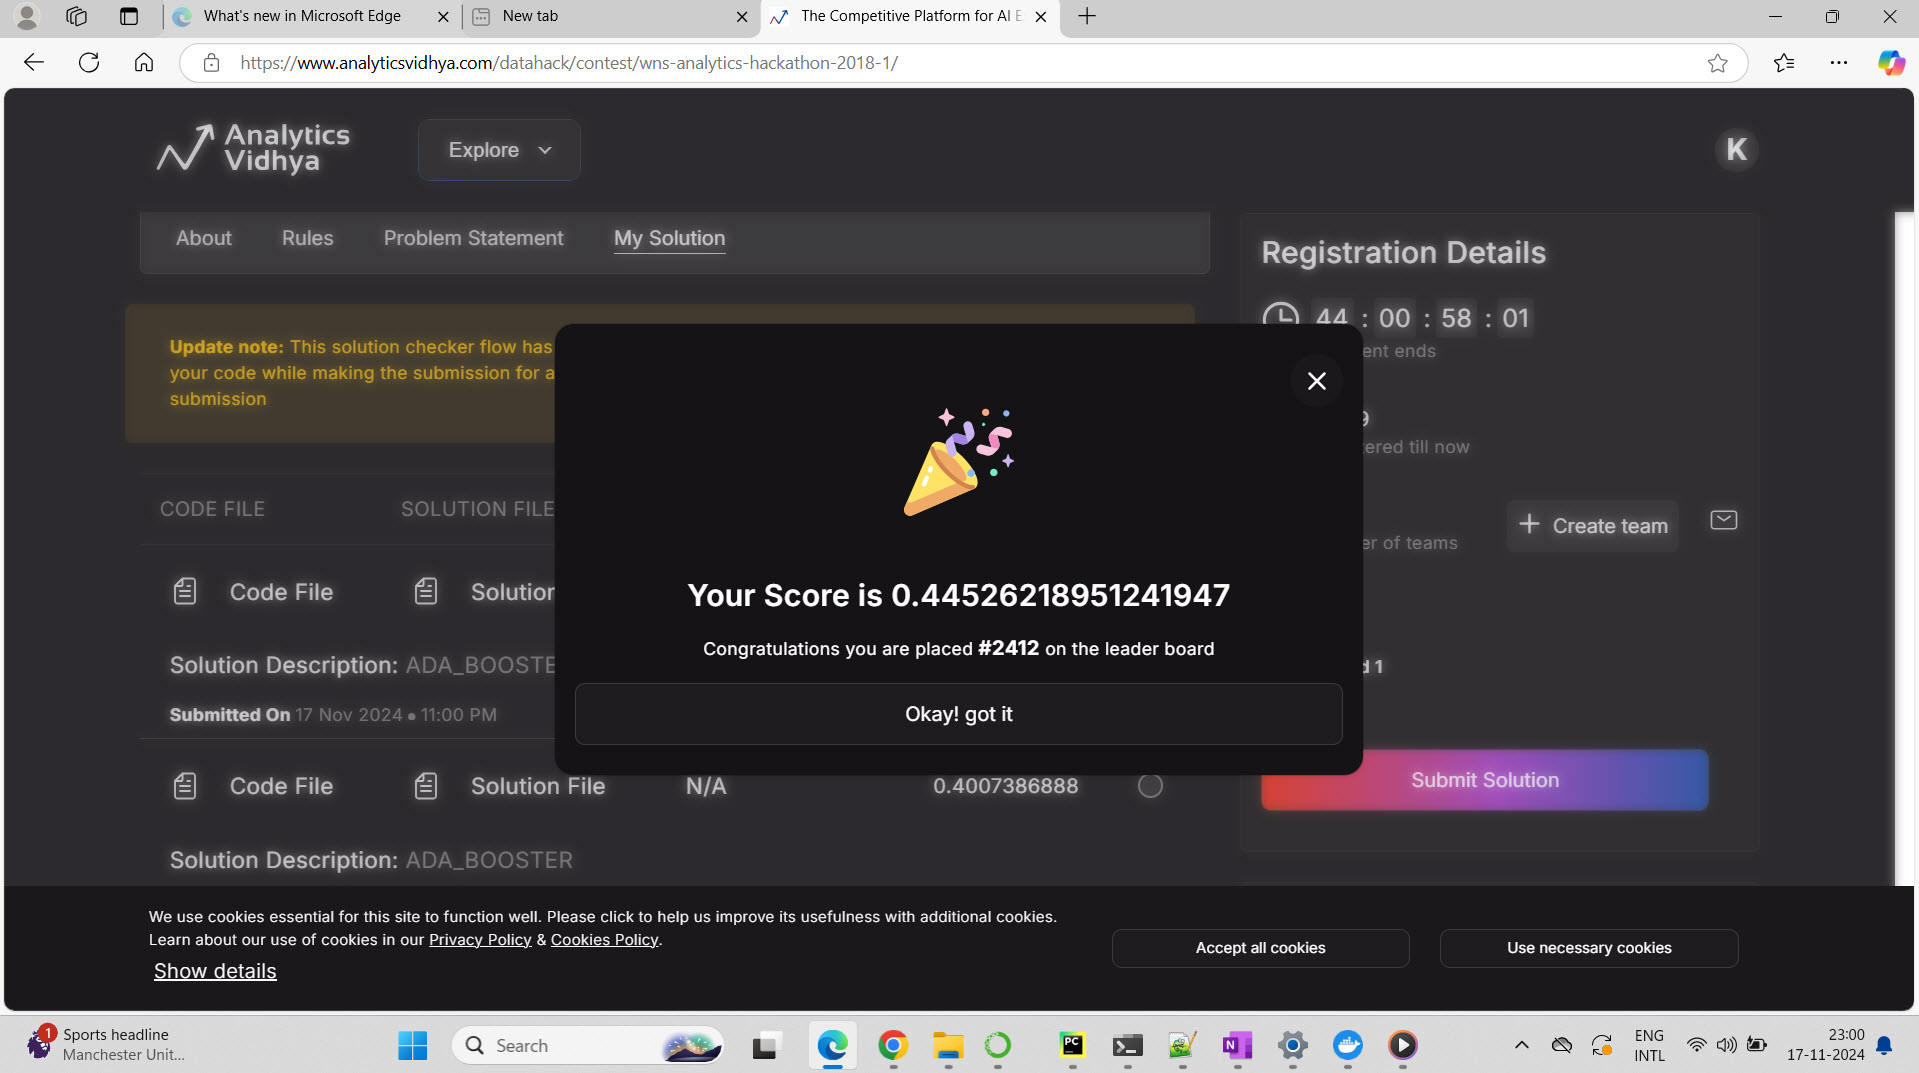

In [ ]:
joblib.dump(new_model_pipeline2,'new_model_pipeline4.pkl')

['new_model_pipeline4.pkl']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
!pip install FastApi
!pip install pydantic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
#model_app.py

from fastapi import FastAPI
from pydantic import BaseModel

import pandas as pd
import joblib

nest_asyncio.apply()

NGROK_AUTH_TOKEN = "2oe8npqGCkIJqw9ytzXck8phnKq_2UrsNfTatkCWAU1xvTTaG"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

app = FastAPI()

class Input(BaseModel):
    #data: list
    city: object
    city_development_index: float
    gender: object
    relevent_experience: object
    enrolled_university: object
    education_level: object
    major_discipline: object
    experience: object
    company_size: object
    company_type: object
    last_new_job: object
    training_hours: int


class Output(BaseModel):
      target: int

@app.post("/predict")
def predict(data: Input) -> Output:
    X_input =pd.DataFrame(data.city, data.city_development_index, data.gender, data.relevant_experience, data.enrolled_university, data.education_level, data.major_discipline, data.experience, data.company_size, data.company_type, data.last_new_job, data.training_hours)
    X.columns=['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours']
    model =joblib.load('new_model_pipeline3.pkl')
    prediction = model.predict(X_input)
    return Output(target=prediction)



Public URL: NgrokTunnel: "https://a7a9-35-245-214-60.ngrok-free.app" -> "http://localhost:8000"


ERROR:    Error loading ASGI app. Could not import module "predict".
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/importer.py", line 19, in import_from_string
    module = importlib.import_module(module_str)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/config.py", line 434, in load
    self.loaded_app = import_from_string(self.app)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/importer.py", line 24, in import_from_string
    raise ImportFromStringError(message.format(module_str=module_str)

TypeError: object of type 'NoneType' has no len()

In [ ]:
uvicorn model_pipeline:app --reload

SyntaxError: invalid syntax (<ipython-input-180-00661061d099>, line 1)

In [231]:
!pip install nest_asyncio
!pip install fastapi uvicorn nest_asyncio pyngrok

In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import model_app

# Allow nested event loops in Colab
nest_asyncio.apply()
app = model_app.app

NGROK_AUTH_TOKEN = "2oe8npqGCkIJqw9ytzXck8phnKq_2UrsNfTatkCWAU1xvTTaG"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

tunnels = ngrok.get_tunnels()
if len(tunnels) >= 3:
    # If yes, disconnect one or more existing tunnels
    # For example, to disconnect the first tunnel:
    ngrok.disconnect(tunnels[0].public_url)
    # or disconnect all and reconnect to 8000
    ngrok.kill() #kills all existing ngrok sessions

# Expose the app via ngrok

public_url = ngrok.connect(8000)
print("Public URL:", public_url)
#ngrok http --url=tops-stirred-macaque.ngrok-free.app 80

# Run Uvicorn server in the background
uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: NgrokTunnel: "https://69fe-34-106-103-178.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [178]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


In [ ]:
import requests

# Replace with your actual Ngrok URL
url = "https://23e4-35-245-214-60.ngrok-free.app/predict"

# Sample payload matching the model fields (feature1, feature2)
payload = {"feature1": 1.2, "feature2": 3.4}

# Send POST request
response = requests.post(url, json=payload)
print(response.json())

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-11' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.10/asyncio/tasks.py", 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
#webapp

import streamlit as st
import pandas as pd
import joblib
st.title("Job Look Prediction")

df= pd.read_csv("train_data.csv")

city= st.selectbox("city",pd.unique(df['city']))
city_development_index= st.number_input("city_development_index")
gender= st.selectbox("gender",pd.unique(df['gender']))
relevent_experience= st.selectbox("relevent_experience",pd.unique(df['relevent_experience']))
enrolled_university= st.selectbox("enrolled_university",pd.unique(df['enrolled_university']))
education_level= st.selectbox("education_level",pd.unique(df['education_level']))
major_discipline= st.selectbox("major_discipline",pd.unique(df['major_discipline']))
experience= st.selectbox("experience",pd.unique(df['experience']))
company_size= st.selectbox("company_size",pd.unique(df['company_size']))
company_type= st.selectbox("company_type",pd.unique(df['company_type']))
last_new_job= st.selectbox("last_new_job",pd.unique(df['last_new_job']))
training_hours= st.number_input("training_hours")

input=    {
  "city": city,
  "city_development_index": city_development_index,
  "gender": gender,
  "relevent_experience": relevent_experience,
  "enrolled_university": enrolled_university,
  "education_level": education_level,
  "major_discipline": major_discipline,
  "experience": experience,
  "company_size": company_size,
  "company_type": company_type,
  "last_new_job": last_new_job,
  "training_hours": training_hours
}

if st.button("Predict"):
    model = joblib.load('new_model_pipeline3.pkl')
    X_input =pd.DataFrame(input, index=0)
    prediction = model.predict(input)
    st.write(prediction)


#streamlit run webapp.py